# Proyek Analisis Data: [Bike-sharing-dataset]
- **Nama:** Aisya Rahma Rabbania
- **Email:** aisyarahmar06@gmail.com
- **ID Dicoding:** aisyarahmar

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Apa saja faktor lingkungan yang paling mempengaruhi jumlah penyewaan sepeda?
- Pertanyaan 2: Kapan waktu paling banyak terjadi transaksi penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

## Data Wrangling

### Gathering Data

In [10]:
df_hour = pd.read_csv("hour.csv")
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

###Hour

In [11]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [12]:
df_hour.isna().sum() #mendeteksi missing value

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [13]:
df_hour.duplicated().sum() #mendeteksi data duplikat

0

In [14]:
df_hour.describe() #ringkasan statistik deskriptif dari datase

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

Tidak memerlukan pembersihan data karena data yang tersedia sudah bersih/bagus

## Exploratory Data Analysis (EDA)

###Pertanyaan 1: Apa saja faktor lingkungan yang paling mempengaruhi jumlah penyewaan sepeda?


####Eksplorasi Distribusi Data

In [15]:
# Distribusi variabel target
df_hour['cnt'].describe()
# Distribusi variabel lingkungan
df_hour[['season', 'holiday', 'weekday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed']].describe()

,season,holiday,weekday,weathersit,temp,atemp,hum,windspeed
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.028770,3.003683,1.425283,0.496987,0.475775,0.627229,0.190098
std,1.106918,0.167165,2.005771,0.639357,0.192556,0.171850,0.192930,0.122340
min,1.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,1.000000,1.000000,0.340000,0.333300,0.480000,0.104500
50%,3.000000,0.000000,3.000000,1.000000,0.500000,0.484800,0.630000,0.194000
75%,3.000000,0.000000,5.000000,2.000000,0.660000,0.621200,0.780000,0.253700
max,4.000000,1.000000,6.000000,4.000000,1.000000,1.000000,1.000000,0.850700


####Korelasi

In [16]:
# Korelasi antara variabel-variabel
correlation_matrix = df_hour[['season', 'holiday', 'weekday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr()
correlation_matrix

,season,holiday,weekday,weathersit,temp,atemp,hum,windspeed,cnt
season,1.000000,-0.009585,-0.002335,-0.014524,0.312025,0.319380,0.150625,-0.149773,0.178056
holiday,-0.009585,1.000000,-0.102088,-0.017036,-0.027340,-0.030973,-0.010588,0.003988,-0.030927
weekday,-0.002335,-0.102088,1.000000,0.003311,-0.001795,-0.008821,-0.037158,0.011502,0.026900
weathersit,-0.014524,-0.017036,0.003311,1.000000,-0.102640,-0.105563,0.418130,0.026226,-0.142426
temp,0.312025,-0.027340,-0.001795,-0.102640,1.000000,0.987672,-0.069881,-0.023125,0.404772
atemp,0.319380,-0.030973,-0.008821,-0.105563,0.987672,1.000000,-0.051918,-0.062336,0.400929
hum,0.150625,-0.010588,-0.037158,0.418130,-0.069881,-0.051918,1.000000,-0.290105,-0.322911
windspeed,-0.149773,0.003988,0.011502,0.026226,-0.023125,-0.062336,-0.290105,1.000000,0.093234
cnt,0.178056,-0.030927,0.026900,-0.142426,0.404772,0.400929,-0.322911,0.093234,1.000000


####Analisis Lanjutan

In [17]:
# Variabel dengan korelasi tertinggi dan terendah
highest_corr_vars = correlation_matrix['cnt'].sort_values(ascending=False).index[1:]
lowest_corr_vars = correlation_matrix['cnt'].sort_values().index[:-1]

print("Variabel dengan Korelasi Tertinggi:")
print(highest_corr_vars)
print("\nVariabel dengan Korelasi Terendah:")
print(lowest_corr_vars)

Variabel dengan Korelasi Tertinggi:
Index(['temp', 'atemp', 'season', 'windspeed', 'weekday', 'holiday',
       'weathersit', 'hum'],
      dtype='object')

Variabel dengan Korelasi Terendah:
Index(['hum', 'weathersit', 'holiday', 'weekday', 'windspeed', 'season',
       'atemp', 'temp'],
      dtype='object')


In [18]:
# Persiapkan data untuk clustering
X = df_hour[['season', 'holiday', 'weekday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']]

# Scaling data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Terapkan K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df_hour['Cluster'] = kmeans.fit_predict(X_scaled)

# Tampilkan statistik untuk setiap cluster
cluster_stats = df_hour.groupby('Cluster')[['season', 'holiday', 'weekday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']].mean()
cluster_stats

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,season,holiday,weekday,weathersit,temp,atemp,hum,windspeed,cnt
Cluster,,,,,,,,,
0,2.440000,1.0,1.814000,1.362000,0.466400,0.444850,0.615360,0.192932,156.870000
1,2.106729,0.0,3.046709,1.552255,0.336473,0.333841,0.651173,0.194695,100.096870
2,2.870736,0.0,3.031717,1.311352,0.647325,0.608932,0.605740,0.185680,274.051112


###Pertanyaan 2: Kapan waktu paling banyak terjadi transaksi penyewaan sepeda?

In [19]:
# Statistik deskriptif untuk variabel waktu
df_hour[['hr', 'weekday']].describe()

,hr,weekday
count,17379.000000,17379.000000
mean,11.546752,3.003683
std,6.914405,2.005771
min,0.000000,0.000000
25%,6.000000,1.000000
50%,12.000000,3.000000
75%,18.000000,5.000000
max,23.000000,6.000000


In [20]:
# Analisis harian
daily_analysis = df_hour.groupby('weekday')['cnt'].mean()
print(daily_analysis)

# Analisis musiman
seasonal_analysis = df_hour.groupby('season')['cnt'].mean()
print(seasonal_analysis)

weekday
0    177.468825
1    183.744655
2    191.238891
3    191.130505
4    196.436665
5    196.135907
6    190.209793
Name: cnt, dtype: float64
season
1    111.114569
2    208.344069
3    236.016237
4    198.868856
Name: cnt, dtype: float64


In [21]:
# Segmentasi data berdasarkan hari
day_segmentation = df_hour.groupby('weekday')['cnt'].mean()
print(day_segmentation)

weekday
0    177.468825
1    183.744655
2    191.238891
3    191.130505
4    196.436665
5    196.135907
6    190.209793
Name: cnt, dtype: float64


## Visualization & Explanatory Analysis

### Pertanyaan 1

###Visualisasi Korelasi

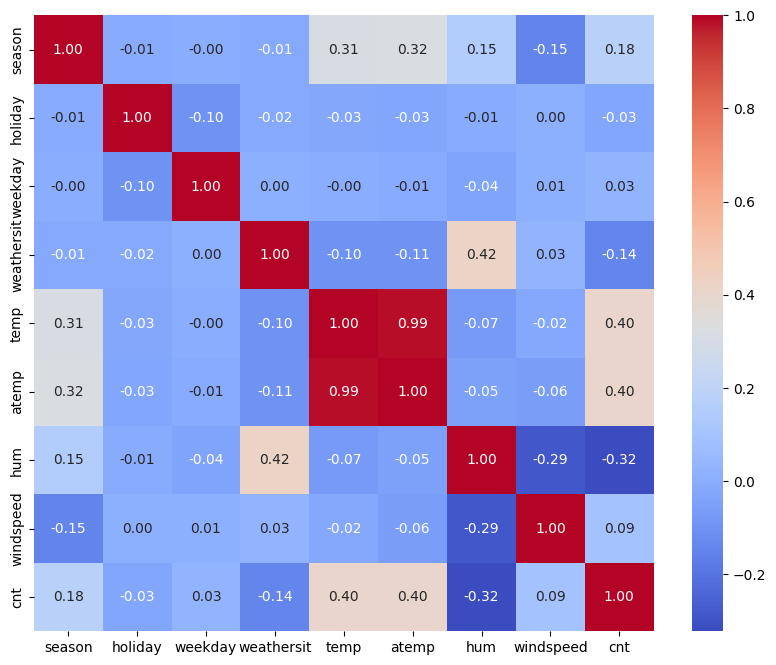

In [22]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

Hasil: hubungan terkuat (>=0) antara 'cnt' dengan variabel lingkungan: windspeed, atemp, temp, season, weekday

###Visualisasi Cluster

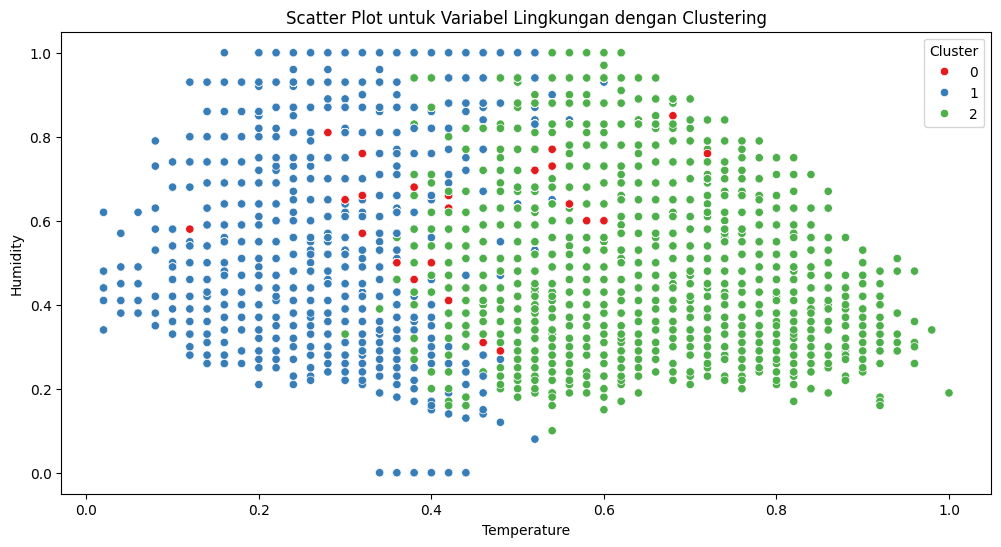

In [23]:
# Scatter plot untuk dua variabel lingkungan yang signifikan
plt.figure(figsize=(12, 6))
sns.scatterplot(x='temp', y='hum', hue='Cluster', data=df_hour, palette='Set1')
plt.title('Scatter Plot untuk Variabel Lingkungan dengan Clustering')
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.show()

### Pertanyaan 2

<ipython-input-24-a65f08fbcb51>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='hr', y='cnt', data=df_hour, ci=None)


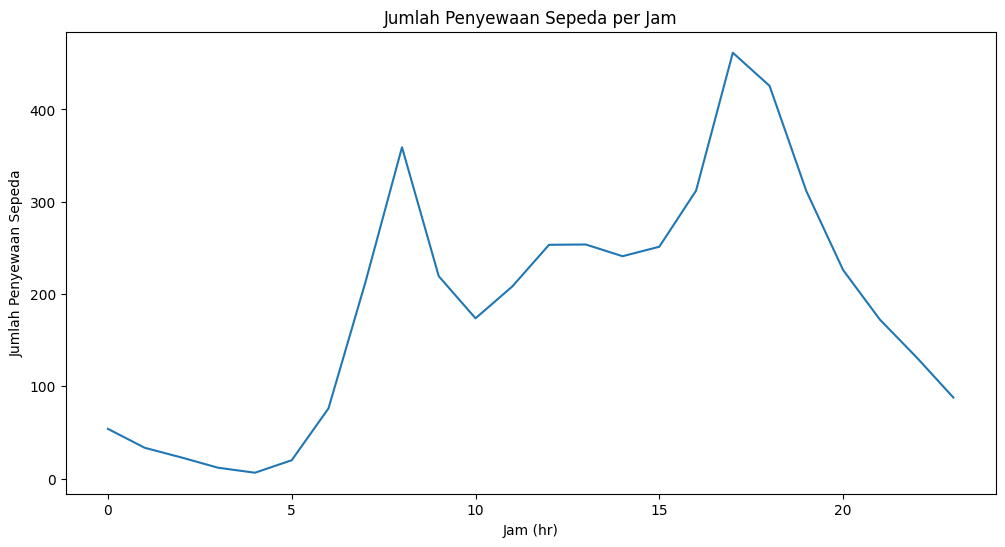

In [24]:
# Plot jumlah penyewaan sepeda per jam
plt.figure(figsize=(12, 6))
sns.lineplot(x='hr', y='cnt', data=df_hour, ci=None)
plt.xlabel('Jam (hr)')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.title('Jumlah Penyewaan Sepeda per Jam')
plt.show()

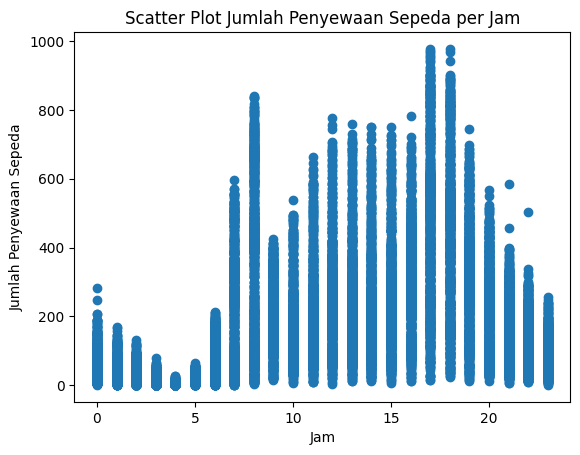

In [25]:
# Scatter plot untuk melihat distribusi pada jam tertentu
plt.scatter(df_hour['hr'], df_hour['cnt'])
plt.xlabel('Jam')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.title('Scatter Plot Jumlah Penyewaan Sepeda per Jam')
plt.show()

## Conclusion

- Conclution pertanyaan 1:
Berdasarkan hasil analisis korelasi dan analisis lebih lanjut menggunakan teknik k-means clustering bahwa faktor lingkungan yang paling berkaitan dengan jumlah penyewaan sepeda adalah temperatur. Hal ini mengindikasikan bahwa penyewa cenderung memepertimbangkan keadaan temperature udara sebelum akhirnya melakukan peminjaman sepeda.
- Conclution pertanyaan 2:
Berdasarkan hasil analisis mengguanakan jam (hr) dan hari (weekday), didapatkan hasil bahwa waktu paling banyak penyewa meminjam sepeda adalah jam 17.00 - 18.00. Selain itu, jumlah penyewaan sepeda juga mengalami kenaikan pada jam 9.00. Informasi tersebut dapat dijadikan pertimbangan bagi perusahaan untuk membuat keputusan seperti promo, dsb.